In [1]:
import numpy as np
np.set_printoptions(precision=3)

import pandas as pd

from time import sleep

from matplotlib import cm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", palette="pastel")

import yfinance as yf
import time

In [2]:
from pacote1_raiz import FireFly
from pacote1_raiz import Pop, Abc, Pso, Sa

from tools.functions import *
from tools.plots import plotPercentiles

# Marko:

* https://kevinvecmanis.io/finance/optimization/2019/04/02/Algorithmic-Portfolio-Optimization.html
* https://www.linkedin.com/pulse/markowitz-portfolio-optimization-python-f%C3%A1bio-neves

In [3]:
#tickers = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"
tickers = "ABEV3.SA AZUL4.SA WEGE3.SA MDIA3.SA RAIL3.SA ITSA4.SA NTCO3.SA EGIE3.SA VVAR3.SA FLRY3.SA"
data = yf.download(tickers=tickers, period = "6mo")['Adj Close']

[*********************100%***********************]  10 of 10 completed


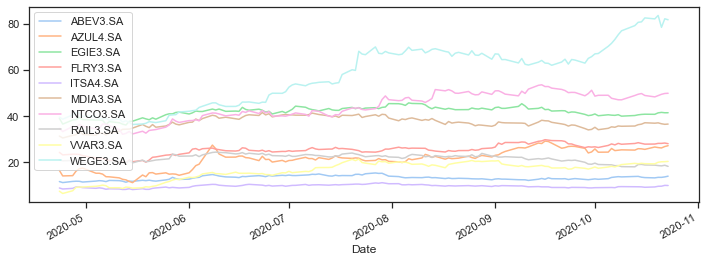

In [4]:
data.plot(figsize=(12,4));

In [5]:
(((data.iloc[-1]-data.iloc[0])/data.iloc[0])*100).sort_values()

RAIL3.SA    -13.584368
EGIE3.SA      6.169341
ITSA4.SA     12.264149
FLRY3.SA     15.537183
MDIA3.SA     16.629359
ABEV3.SA     20.259741
NTCO3.SA     43.988445
AZUL4.SA     65.546726
WEGE3.SA    106.951517
VVAR3.SA    175.679355
dtype: float64

In [6]:
returns = np.log(data/data.shift(1))
returns

,ABEV3.SA,AZUL4.SA,EGIE3.SA,FLRY3.SA,ITSA4.SA,MDIA3.SA,NTCO3.SA,RAIL3.SA,VVAR3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-24,-0.038840,-0.157108,-0.066776,-0.046087,-0.051055,-0.026902,-0.040401,-0.020709,-0.142892,-0.022479
2020-04-27,0.044021,0.008541,0.047506,0.012471,0.031637,0.036766,0.063259,0.005822,0.171025,0.047670
2020-04-28,0.007722,0.128825,0.004231,0.000427,0.067993,0.007257,-0.009651,-0.023001,0.177466,0.023851
2020-04-29,-0.002567,0.064539,0.023109,-0.005139,-0.002157,0.058903,0.035308,-0.022023,0.015368,-0.004338
...,...,...,...,...,...,...,...,...,...,...
2020-10-19,-0.009084,0.039598,-0.000982,0.001439,0.016403,-0.005143,-0.012563,-0.004276,-0.003634,-0.005226
2020-10-20,0.017339,-0.009468,0.015361,0.010374,0.029917,0.004062,0.011949,-0.010229,0.035253,0.017995
2020-10-21,-0.000748,-0.006107,0.004827,0.000000,0.004202,-0.010870,0.010998,-0.007059,0.010487,-0.063621


In [7]:
returns.mean().sort_values()

RAIL3.SA   -0.001150
EGIE3.SA    0.000471
ITSA4.SA    0.000911
FLRY3.SA    0.001137
MDIA3.SA    0.001211
ABEV3.SA    0.001453
NTCO3.SA    0.002871
AZUL4.SA    0.003969
WEGE3.SA    0.005727
VVAR3.SA    0.007985
dtype: float64

<AxesSubplot:>

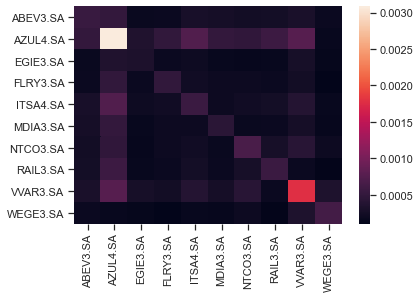

In [8]:
sns.heatmap(returns.cov())

In [9]:
(data / data.shift(1)).mean()

ABEV3.SA    1.001729
AZUL4.SA    1.005555
EGIE3.SA    1.000632
FLRY3.SA    1.001382
ITSA4.SA    1.001189
MDIA3.SA    1.001425
NTCO3.SA    1.003212
RAIL3.SA    0.999132
VVAR3.SA    1.008920
WEGE3.SA    1.006060
dtype: float64

In [10]:
def portfolio_simulation(iterations, adj_closes):
    '''
    Runs a simulation by randomly selecting portfolio weights a specified
    number of times (iterations), returns the list of results and plots 
    all the portfolios as well.
    
    Parameters:
    -----------  
        assets: list
            all the assets that are to be pulled from Quandl to comprise
            our portfolio.    
        iterations: int 
            the number of randomly generated portfolios to build.
    
    Returns:
    --------
        port_returns: array
            array of all the simulated portfolio returns.
        port_vols: array
            array of all the simulated portfolio volatilities.
    '''
    
    start = time.time()
    num_assets = len(adj_closes.columns)
    
    returns = np.log(adj_closes / adj_closes.shift(1))
    
    port_returns = []
    port_vols = []
    w = []
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(num_assets),size=1)
        weights = weights[0]
        w.append(weights)
        port_returns.append(np.sum(returns.mean() * weights) * 252)
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    
    # Convert lists to arrays
    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    # Plot the distribution of portfolio returns and volatilities 
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols, port_returns, c = (port_returns / port_vols), marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio (not adjusted for short rate)')
       
    
    print('Elapsed Time: %.2f seconds' % (time.time() - start))
    
    return port_returns, port_vols, w

Elapsed Time: 0.81 seconds


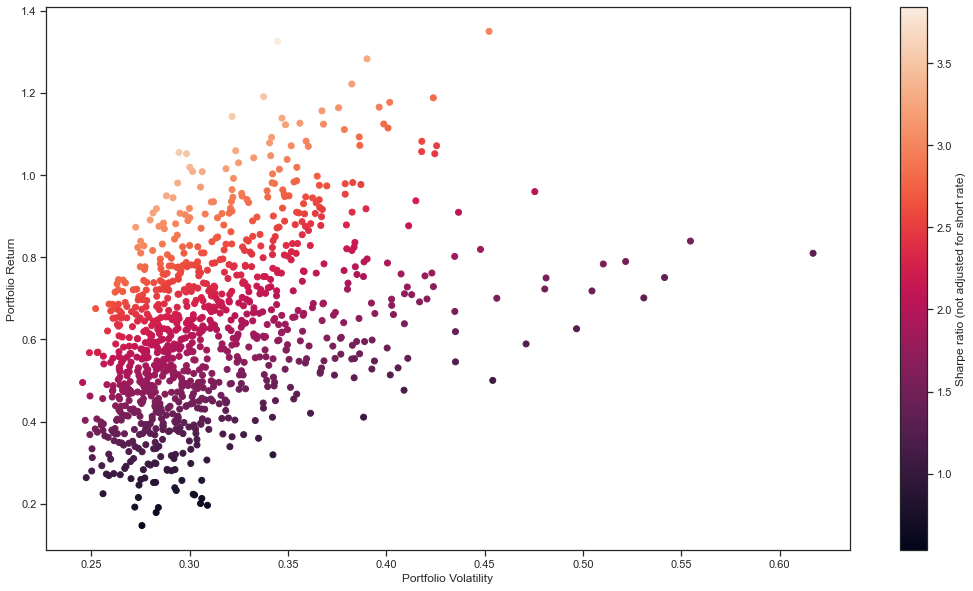

In [11]:
port_returns, port_vols, w = portfolio_simulation(1000, data)

## Otimizando:

In [31]:
def portfolio_stats(weights, data):

    returns = np.log(data/data.shift(1))
    weights = np.array(weights)
    port_return = np.sum(returns.mean() * weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = port_return/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}

In [32]:
def minimize_sharpe(weights):
    val = portfolio_stats(weights, data)['sharpe']
    res = sum(weights)-1
    
    if  (res > 0):
        val -= res
    if (res < 0):
        val += res
    return -val

In [33]:
nPop = 20
nGen = 100
ranges = np.array([[0, 1]]*len(data.columns))

meta3 = Abc()

In [16]:
op = Pop(meta3, minimize_sharpe, ranges, nPop, nGen)
for g in range(1, nGen):
    next(op)
    
print(op.pBest['value'][-1])
print('sum', sum(op.pBest['ch'][-1]))
print(portfolio_stats(op.pBest['ch'][-1], data))

{atv: w for atv, w in zip(data.columns, op.pBest['ch'][-1])}

-4.045611829469972
sum 0.9993324562188454
{'return': 1.4880263662190762, 'volatility': 0.3677517612985454, 'sharpe': 4.046279373251126}


{'ABEV3.SA': 0.03543812486187668,
 'AZUL4.SA': 0.0,
 'EGIE3.SA': 0.0,
 'FLRY3.SA': 0.0013423398672130096,
 'ITSA4.SA': 0.0,
 'MDIA3.SA': 0.013470512288033426,
 'NTCO3.SA': 0.08565201286640224,
 'RAIL3.SA': 0.0,
 'VVAR3.SA': 0.28562491054200867,
 'WEGE3.SA': 0.5778045557933114}

In [17]:
df = pd.DataFrame([portfolio_stats(w, data) for w in op.pBest['ch']])
df

,return,volatility,sharpe
0,2.728326,1.368210,1.994085
1,2.722802,1.359263,2.003146
2,2.719019,1.356709,2.004129
3,2.515559,1.220717,2.060723
4,2.494672,1.191337,2.094011
...,...,...,...
95,1.488093,0.367824,4.045666
96,1.488093,0.367824,4.045666
97,1.488026,0.367752,4.046279
98,1.488026,0.367752,4.046279


<AxesSubplot:>

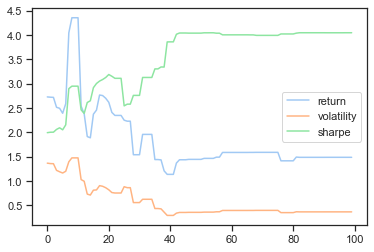

In [18]:
df.plot()

<AxesSubplot:xlabel='volatility', ylabel='return'>

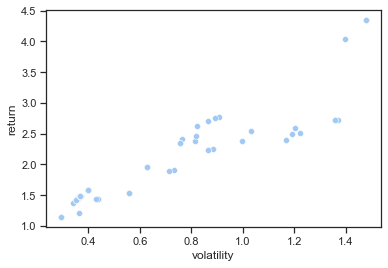

In [19]:
sns.scatterplot(data=df, x='volatility', y='return')

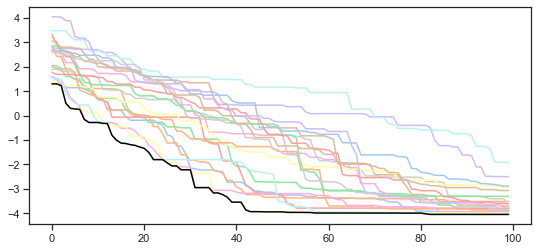

In [20]:
plt.figure(figsize=(9,4))
plt.plot(np.vstack([p['value'] for p in op.pList]).T);
plt.plot(op.pBest['value'], c='black');

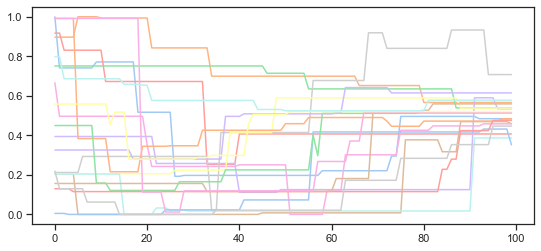

In [21]:
plt.figure(figsize=(9,4))
plt.plot(np.vstack([p['ch'][:,-1] for p in op.pList]).T);

In [22]:
import scipy.optimize as optimize

constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(len(data.columns)))
initializer = len(data.columns) * [1./len(data.columns)]

optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)

optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(data.columns,list(optimal_sharpe_weights)))

[('ABEV3.SA', 0.0),
 ('AZUL4.SA', 0.0113),
 ('EGIE3.SA', 0.0),
 ('FLRY3.SA', 0.0),
 ('ITSA4.SA', 0.0),
 ('MDIA3.SA', 0.0),
 ('NTCO3.SA', 0.01),
 ('RAIL3.SA', 0.0),
 ('VVAR3.SA', 0.2803),
 ('WEGE3.SA', 0.6984)]

In [23]:
portfolio_stats(optimal_sharpe['x'], data)

{'return': 1.5904042894887565,
 'volatility': 0.38745545662569025,
 'sharpe': 4.104740976780722}

In [24]:
ret=[]
vol=[]
sharpe=[]
for w in np.vstack([p['ch'] for p in op.pList]):  
    result = portfolio_stats(w, data)
    ret.append(result['return'])
    vol.append(result['volatility'])
    sharpe.append(result['sharpe'])
ret = np.array(ret)
vol = np.array(vol)
sharpe = np.array(sharpe)

In [25]:
y = np.concatenate([ret, df['return'], port_returns])
x = np.concatenate([vol, df['volatility'], port_vols])
s = np.concatenate([sharpe, df['sharpe'], port_returns/port_vols])

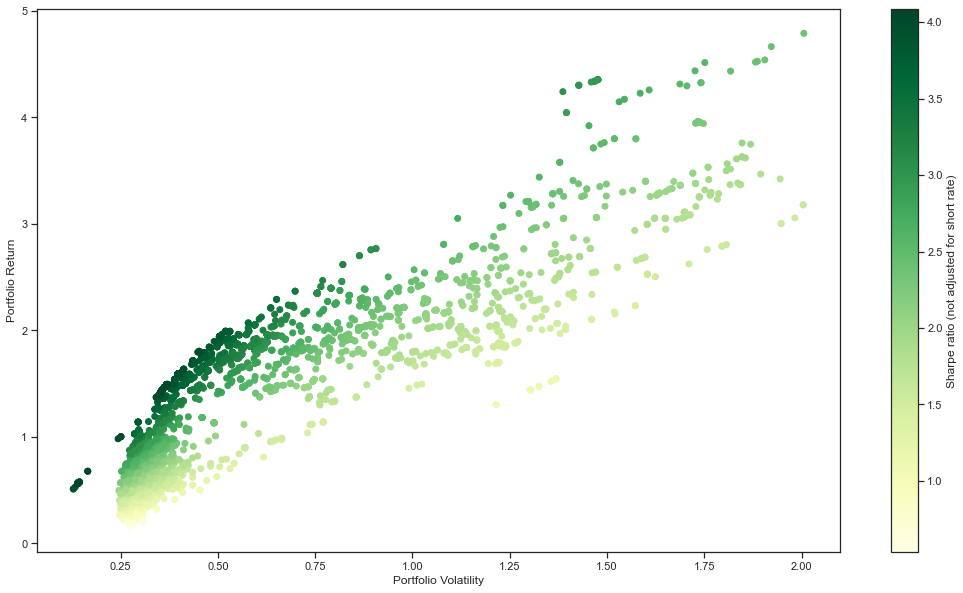

In [158]:
plt.figure(figsize = (18,10))
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
#plt.scatter(port_vols, port_returns, c = (port_returns / port_vols), cmap='YlGn')
#plt.scatter(vol, ret, c = sharpe, cmap='YlGn')
#plt.scatter(x=df['volatility'], y=df['return'], c=df['sharpe'], cmap='YlGn')

plt.scatter(x=x, y=y, c=s, cmap='YlGn')
plt.colorbar(label = 'Sharpe ratio (not adjusted for short rate)')


## Curva

In [150]:
def minimize_vol(ret):
    def minimize_volatility(weights):
        port = portfolio_stats(weights, data)
        vol = port['volatility'] 
        retur = port['return']
        
        res = (retur-ret)*3
        if (res > 0):
            vol += res
        if (res < 0):
            vol -= res
            
        res = sum(weights)-1
        if (res > 0):
            vol += res
        if (res < 0):
            vol -= res
        return vol
    return minimize_volatility

In [151]:
nPop = 10
nGen = 100
ranges = np.array([[0, 1]]*len(data.columns))

meta3 = Abc()

In [152]:
curva = []
for ret in np.linspace(0, 5, 100):
    minimize_volatility = minimize_vol(ret)
    
    op = Pop(meta3, minimize_volatility, ranges, nPop, nGen)
    for g in range(1, nGen):
        next(op)
    
    curva.append(op.pBest['ch'][-1])

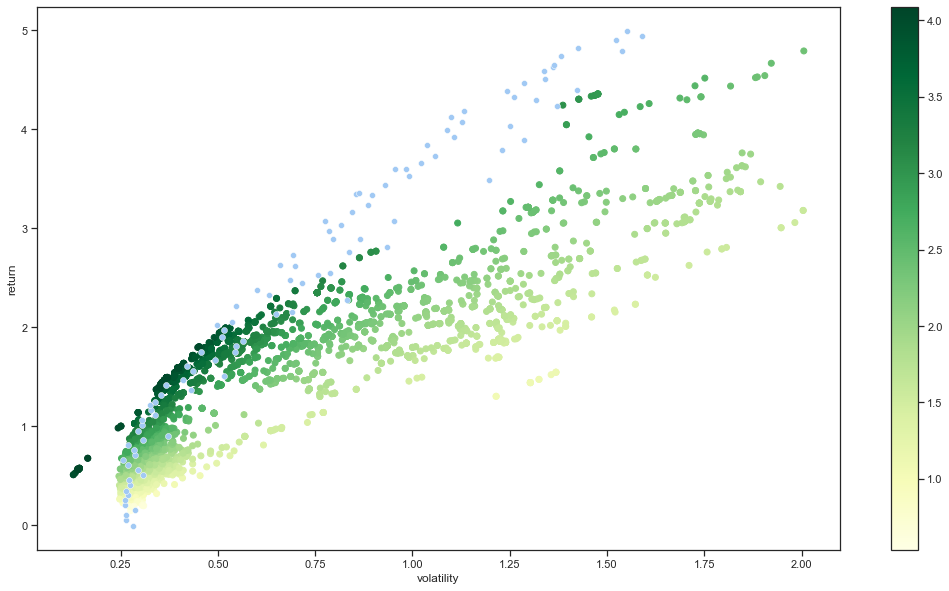

In [160]:
df = pd.DataFrame([portfolio_stats(w, data) for w in curva])
plt.figure(figsize = (18,10))
plt.scatter(x=x, y=y, c=s, cmap='YlGn')
sns.scatterplot(data= df, x='volatility', y='return')
plt.colorbar()

In [154]:
df

,return,volatility,sharpe
0,-0.003471,0.282417,-0.012289
1,0.049387,0.263343,0.187540
2,0.102502,0.264104,0.388111
3,0.154033,0.285678,0.539184
4,0.202012,0.261110,0.773666
...,...,...,...
95,4.788696,1.537770,3.114052
96,4.813930,1.425719,3.376492
97,4.897843,1.523233,3.215427
98,4.944263,1.590518,3.108587
